In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [56]:
df = pd.read_csv('datajaringan.csv')

In [57]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000548,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.001245,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001793,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002340,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record


In [58]:
df.isna().sum()

No.              0
Time             0
Source           0
Destination    336
Protocol         0
Length           0
Info             0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247821 entries, 0 to 247820
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          247821 non-null  int64  
 1   Time         247821 non-null  float64
 2   Source       247821 non-null  object 
 3   Destination  247485 non-null  object 
 4   Protocol     247821 non-null  object 
 5   Length       247821 non-null  int64  
 6   Info         247821 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.2+ MB


In [60]:
df.duplicated().sum()

0

In [61]:
df = df.dropna()

In [62]:
df.isna().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247485 entries, 0 to 247820
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          247485 non-null  int64  
 1   Time         247485 non-null  float64
 2   Source       247485 non-null  object 
 3   Destination  247485 non-null  object 
 4   Protocol     247485 non-null  object 
 5   Length       247485 non-null  int64  
 6   Info         247485 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 15.1+ MB


In [64]:
df.shape

(247485, 7)

In [65]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000548,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.001245,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001793,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002340,10.10.1.198,142.251.10.95,TLSv1.2,64468,Ignored Unknown Record


In [66]:
# df['Info'].nunique()
# df.tail()
df = df.loc[df['Info'] != 'Ignored Unknown Record']

In [67]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
43,44,0.027037,142.251.10.95,10.10.1.198,TCP,80,443 > 49476 [ACK] Seq=1 Ack=4294555477 Win=1...
44,45,0.027037,142.251.10.95,10.10.1.198,TCP,80,[TCP Dup ACK 44#1] 443 > 49476 [ACK] Seq=1 A...
45,46,0.027037,142.251.10.95,10.10.1.198,TCP,80,[TCP Dup ACK 44#2] 443 > 49476 [ACK] Seq=1 A...
48,49,0.027137,142.251.10.95,10.10.1.198,TCP,80,443 > 49476 [ACK] Seq=1 Ack=4294556877 Win=1...
49,50,0.027137,142.251.10.95,10.10.1.198,TCP,88,[TCP Dup ACK 49#1] 443 > 49476 [ACK] Seq=1 A...


In [68]:
df.isna().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [69]:
df.nunique()

No.            247383
Time            80128
Source             18
Destination        18
Protocol            8
Length            240
Info           238237
dtype: int64

In [70]:
uniqueValues = df['Source'].unique()
print(uniqueValues)

['142.251.10.95' '10.10.1.198' '202.79.184.254' '45.88.67.192'
 '18.155.68.17' '64.112.72.210' '45.170.130.82' '157.230.30.107'
 '185.246.220.83' '10.10.1.197' '64.112.72.94' '202.29.233.166'
 '61.177.173.24' '127.0.0.1' '91.189.94.4' '10.10.1.5' '127.0.0.53'
 '142.250.4.95']


In [71]:
uniqueValues1 = df['Destination'].unique()
print(uniqueValues1)

['10.10.1.198' '142.251.10.95' '202.79.184.254' '18.155.68.17'
 '45.88.67.192' '64.112.72.210' '45.170.130.82' '157.230.30.107'
 '185.246.220.83' '10.10.1.197' '64.112.72.94' '202.29.233.166'
 '61.177.173.24' '127.0.0.1' '91.189.94.4' '127.0.0.53' '10.10.1.5'
 '142.250.4.95']


In [72]:
uniqueValues2 = df['Protocol'].unique()
print(uniqueValues2)

['TCP' 'TLSv1.2' 'HTTP' 'HTTP/JSON' 'SSHv2' 'NTP' 'DNS' 'TLSv1.3']


In [73]:
uniqueValues3 = df['Length'].unique()
print(uniqueValues3)

[   80    88    96 64468 16474 17698 49286 10590 32880  1292  2964    68
  1516  4412  2957  5694 27866   301    74    62    56   497  2552   126
   318   214   556  4186 18268  2868 43468 21068  8120 13038 21746 51868
  9868 12668 44868  7068  9344 34104 35704  1468 60268 26668 37868  6896
 39376   338 16868 47668  9108 14262 47214 35328  4268 28068 29468 32268
 33668 30868 42068 22468 46268 40668 56068  8468 58868  5668 63068 49068
  2730 11814 29584  5860  7308  8756 10204 11652  1463  1942  2516 34480
 16451 14548 15996 21788 20340 18892 13100 24684 17444  4351 19668 57468
 61668 50468 11268 14068 13016  6918  9012 11792  7788   633  5672  4164
  1895   631 55782  2673  3527   635   388  2310  3325   782   755  1326
  1944   585  1769   387  1730  1972   491  2343 15468 25268 35068 39268
 54668  8842 49168    60    71 23868 36468 53268  8490 63126  2562 15486
 52110   353   340  3600  4676 13178  3740  7884  2018 64350   794 32762
 10568 16850  5900 19298  2892 54558  5178  3954  8

In [74]:
# uniqueValues = df['Info'].value_counts
# print(uniqueValues)

df['Info'].duplicated().sum()

9146

# Explore Data Analysis


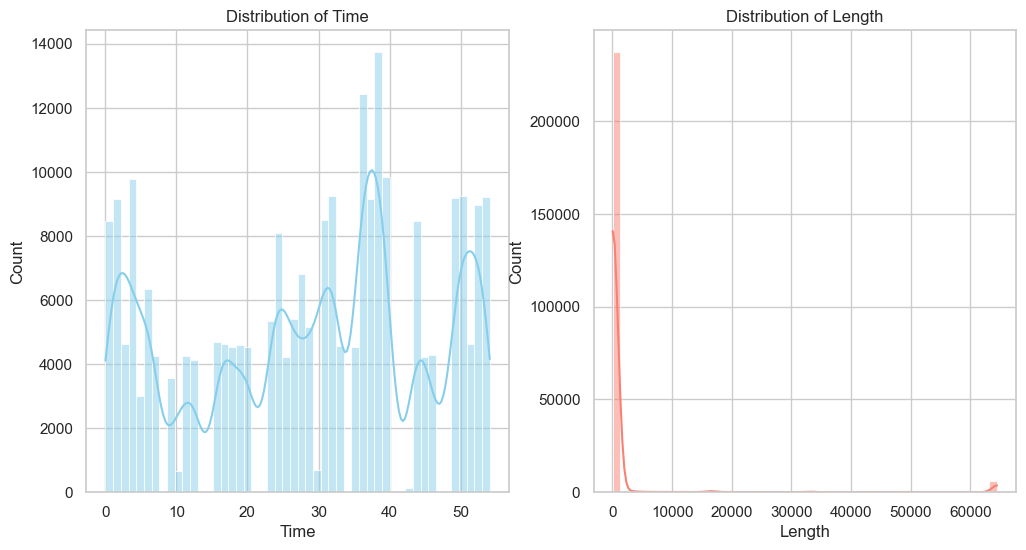

In [75]:
# Set style
sns.set(style="whitegrid")

# Plot histogram for Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Time')

# Plot histogram for Length
plt.subplot(1, 2, 2)
sns.histplot(df['Length'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Length')

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '142.251.10.95'),
  Text(1, 0, '10.10.1.198'),
  Text(2, 0, '202.79.184.254'),
  Text(3, 0, '45.88.67.192'),
  Text(4, 0, '18.155.68.17'),
  Text(5, 0, '64.112.72.210'),
  Text(6, 0, '45.170.130.82'),
  Text(7, 0, '157.230.30.107'),
  Text(8, 0, '185.246.220.83'),
  Text(9, 0, '10.10.1.197'),
  Text(10, 0, '64.112.72.94'),
  Text(11, 0, '202.29.233.166'),
  Text(12, 0, '61.177.173.24'),
  Text(13, 0, '127.0.0.1'),
  Text(14, 0, '91.189.94.4'),
  Text(15, 0, '10.10.1.5'),
  Text(16, 0, '127.0.0.53'),
  Text(17, 0, '142.250.4.95')])

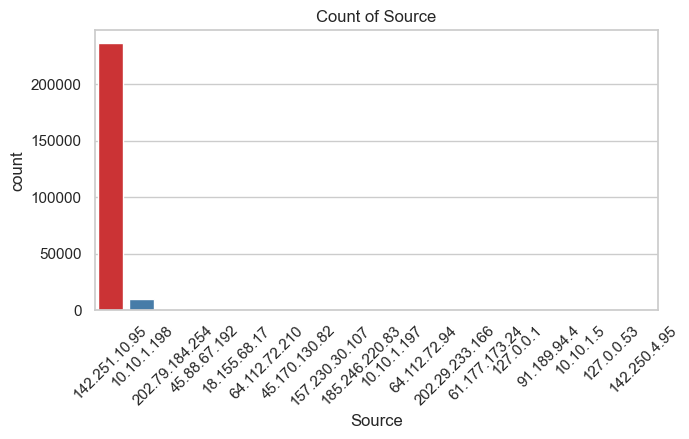

In [76]:
# Plot for Source
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
# sns.countplot(df['Source'], palette='viridis')
sns.countplot(x='Source', data=df, palette='Set1')
plt.title('Count of Source')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '10.10.1.198'),
  Text(1, 0, '142.251.10.95'),
  Text(2, 0, '202.79.184.254'),
  Text(3, 0, '18.155.68.17'),
  Text(4, 0, '45.88.67.192'),
  Text(5, 0, '64.112.72.210'),
  Text(6, 0, '45.170.130.82'),
  Text(7, 0, '157.230.30.107'),
  Text(8, 0, '185.246.220.83'),
  Text(9, 0, '10.10.1.197'),
  Text(10, 0, '64.112.72.94'),
  Text(11, 0, '202.29.233.166'),
  Text(12, 0, '61.177.173.24'),
  Text(13, 0, '127.0.0.1'),
  Text(14, 0, '91.189.94.4'),
  Text(15, 0, '127.0.0.53'),
  Text(16, 0, '10.10.1.5'),
  Text(17, 0, '142.250.4.95')])

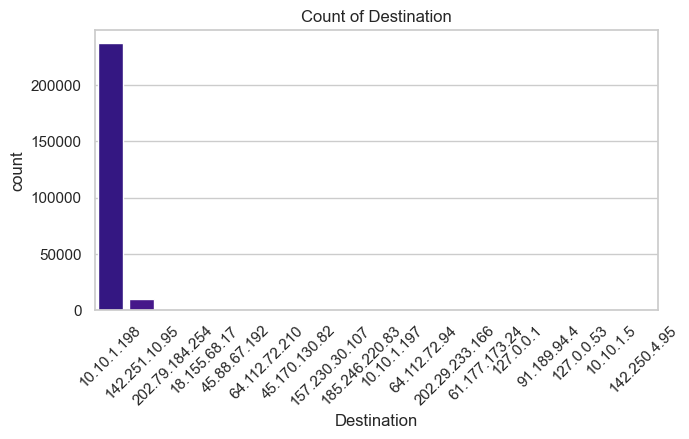

In [77]:
# Plot for Destination
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 2)
sns.countplot(x='Destination', data=df, palette='plasma')
plt.title('Count of Destination')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'TCP'),
  Text(1, 0, 'TLSv1.2'),
  Text(2, 0, 'HTTP'),
  Text(3, 0, 'HTTP/JSON'),
  Text(4, 0, 'SSHv2'),
  Text(5, 0, 'NTP'),
  Text(6, 0, 'DNS'),
  Text(7, 0, 'TLSv1.3')])

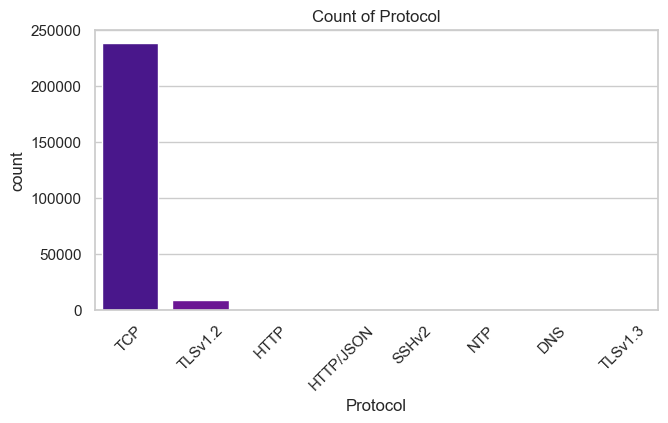

In [78]:
# Visualisasi countplot
# Plot for Destination
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 2)
sns.countplot(x='Protocol', data=df, palette='plasma')
plt.title('Count of Protocol')
plt.xticks(rotation=45)

In [79]:
# # Plot for Info
# plt.figure(figsize=(16, 8))
# plt.subplot(2, 2, 4)
# sns.countplot(x='Info', data=df, palette='inferno')
# plt.title('Count of Info')
# plt.xticks(rotation=45)
# # plt.tight_layout()
# # plt.show()

In [80]:
len(df['Protocol'])

247383

In [81]:
df['Protocol'].value_counts()

TCP          238259
TLSv1.2        8973
HTTP             79
HTTP/JSON        55
DNS               8
TLSv1.3           4
SSHv2             3
NTP               2
Name: Protocol, dtype: int64

In [82]:
df['Source'].value_counts()

142.251.10.95     235986
10.10.1.198        10158
202.79.184.254       950
10.10.1.197          129
127.0.0.1             45
64.112.72.210         43
64.112.72.94          12
61.177.173.24         10
157.230.30.107         8
45.88.67.192           8
185.246.220.83         7
202.29.233.166         7
18.155.68.17           6
142.250.4.95           5
45.170.130.82          4
10.10.1.5              2
127.0.0.53             2
91.189.94.4            1
Name: Source, dtype: int64

In [83]:
# Visualisasi countplot
# sns.set(style="darkgrid")  # Opsi styling, opsional
# plt.figure(figsize=(8, 6))  # Opsi untuk mengatur ukuran plot

# sns.countplot(x='Destination', data=df, palette='Set1')  # 'Category' adalah kolom yang ingin dihitung

# plt.title('Countplot of Destination')
# plt.xticks(rotation=45)  #
# plt.show()

In [84]:
df['Destination'].value_counts()

10.10.1.198       237178
142.251.10.95       9489
202.79.184.254       450
10.10.1.197          106
127.0.0.1             45
64.112.72.210         43
64.112.72.94          13
45.88.67.192           8
157.230.30.107         8
61.177.173.24          8
185.246.220.83         7
18.155.68.17           7
202.29.233.166         7
142.250.4.95           6
45.170.130.82          3
127.0.0.53             2
10.10.1.5              2
91.189.94.4            1
Name: Destination, dtype: int64

In [85]:
dfgroupby = df.groupby('Protocol').agg({
                                            'Destination' : 'count',
                                            'Source' : 'count'
                                                                    }).reset_index()

In [86]:
dfgroupby

,Protocol,Destination,Source
0,DNS,8,8
1,HTTP,79,79
2,HTTP/JSON,55,55
3,NTP,2,2
4,SSHv2,3,3
5,TCP,238259,238259
6,TLSv1.2,8973,8973
7,TLSv1.3,4,4


In [87]:
dfgroupby2 = df.groupby([ 'Protocol', 'Source', 'Destination',]).agg({
                                            'No.' : 'count'
                                                                    }).reset_index()

In [88]:
# Rename kolom
dfgroupby2.rename(columns={'Protocol' : 'Protocol','Destination': 'Destination', 'Source': 'Source',  'No.' :'Jumlah'}, inplace=True)

In [89]:
dfgroupby2

,Protocol,Source,Destination,Jumlah
0,DNS,10.10.1.198,10.10.1.5,2
1,DNS,10.10.1.5,10.10.1.198,2
2,DNS,127.0.0.1,127.0.0.53,2
3,DNS,127.0.0.53,127.0.0.1,2
4,HTTP,10.10.1.197,10.10.1.198,55
5,HTTP,10.10.1.198,202.79.184.254,3
6,HTTP,127.0.0.1,127.0.0.1,12
7,HTTP,202.79.184.254,10.10.1.198,9
8,HTTP/JSON,10.10.1.198,10.10.1.197,55
9,NTP,10.10.1.198,91.189.94.4,1


dari data diatas source (142.251.10.95) yang menuju ke destination (10.10.1.198) yang paling banyak menggunakan protocol TCP. Karena Protocol TCP sering digunakan karena menawarkan kepastian pengiriman data, pengiriman data dalam urutan yang benar, mekanisme flow control, koneksi-oriented, dukungan untuk mode full-duplex, dan kompatibilitas dengan berbagai aplikasi tingkat tinggi seperti web, transfer file, dan email. Meskipun memiliki beberapa overhead, TCP umumnya dipilih untuk aplikasi yang memerlukan keandalan dan keintiman urutan data dalam komunikasi jaringan. Pilihan antara TCP dan UDP tergantung pada kebutuhan khusus aplikasi atau layanan yang diinginkan, dengan UDP seringkali dipilih untuk situasi di mana latensi yang rendah lebih diutamakan daripada keandalan.

In [90]:
# Membagi data menjadi fitur (X) dan label (y)
X = df.drop('Info', axis=1)
y = df['Info'].values

In [91]:
# Melakukan label encoding pada kolom kategorikal
label_encoder = LabelEncoder()
X['Source'] = label_encoder.fit_transform(X['Source'])
X['Destination'] = label_encoder.fit_transform(X['Destination'])
X['Protocol'] = label_encoder.fit_transform(X['Protocol'])

In [92]:
y = label_encoder.fit_transform(y)


In [93]:
y

array([   652, 195974, 195975, ...,  68782, 181640, 181641])

In [94]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
y_test

array([193228, 102828, 141509, ...,  90761, 181031, 231689])

In [96]:
# # Melakukan label encoding pada kolom 'Info'
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
unique_labels_data = df['Info'].unique()
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in data:", len(unique_labels_data))
print("Unique labels in y_train:", len(unique_labels_train))
print("Unique labels in y_test:", len(unique_labels_test))



Unique labels in data: 238237
Unique labels in y_train: 190570
Unique labels in y_test: 47701


In [97]:
missing_labels_train = set(unique_labels_data) - set(unique_labels_train)
missing_labels_test = set(unique_labels_data) - set(unique_labels_test)

print("Missing labels in y_train:", len(missing_labels_train))
print("Missing labels in y_test:", len(missing_labels_test))

print("Example missing labels in y_train:", list(missing_labels_train)[:10])
print("Example missing labels in y_test:", list(missing_labels_test)[:10])


Missing labels in y_train: 238237
Missing labels in y_test: 238237
Example missing labels in y_train: ['[TCP Dup ACK 247457#30] 443  >  49476 [ACK] Seq=32603 Ack=463919948 Win=15361 Len=0 TSval=4249696707 TSecr=3916736663 SLE=464029366 SRE=464034966 SLE=464073596 SRE=464074996 SLE=464086196 SRE=464091796', '443  >  49476 [ACK] Seq=2575 Ack=51871935 Win=15361 Len=0 TSval=4249646761 TSecr=3916686714 SLE=52130935 SRE=52132335 SLE=52105735 SRE=52107135 SLE=52101535 SRE=52102935', '[TCP Dup ACK 163318#1] 443  >  49476 [ACK] Seq=15445 Ack=305845797 Win=15361 Len=0 TSval=4249680015 TSecr=3916719969 SLE=306087997 SRE=306089397 SLE=306104797 SRE=306106197 SLE=306037597 SRE=306038997', '[TCP Dup ACK 149235#2] 443  >  49476 [ACK] Seq=14158 Ack=279037915 Win=15361 Len=0 TSval=4249678644 TSecr=3916718596 SLE=279102315 SRE=279103715 SLE=279215715 SRE=279217115 SLE=279098115 SRE=279100915', '[TCP Dup ACK 2453#1] 443  >  49476 [ACK] Seq=1 Ack=4173119 Win=15361 Len=0 TSval=4249642712 TSecr=3916682665 S

In [98]:
# # Mengonversi label-label yang hilang pada y_train
# for label in missing_labels_train:
#     if label not in label_encoder.classes_:
#         label_encoder.classes_ = np.append(label_encoder.classes_, label)

# # Mengonversi label-label yang hilang pada y_test
# for label in missing_labels_test:
#     if label not in label_encoder.classes_:
#         label_encoder.classes_ = np.append(label_encoder.classes_, label)

# # Melakukan label encoding pada kolom 'Info'
# y_train_encoded = label_encoder.transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)


In [99]:
print(df['Info'].unique()[:10])


['443  >  49476 [ACK] Seq=1 Ack=4294555477 Win=15361 Len=0 TSval=4249642662 TSecr=3916682239 SLE=4294563795 SRE=4294565195'
 '[TCP Dup ACK 44#1] 443  >  49476 [ACK] Seq=1 Ack=4294555477 Win=15361 Len=0 TSval=4249642662 TSecr=3916682239 SLE=4294563795 SRE=4294566595'
 '[TCP Dup ACK 44#2] 443  >  49476 [ACK] Seq=1 Ack=4294555477 Win=15361 Len=0 TSval=4249642662 TSecr=3916682239 SLE=4294563795 SRE=4294567995'
 '443  >  49476 [ACK] Seq=1 Ack=4294556877 Win=15361 Len=0 TSval=4249642662 TSecr=3916682620 SLE=4294563795 SRE=4294569395'
 '[TCP Dup ACK 49#1] 443  >  49476 [ACK] Seq=1 Ack=4294556877 Win=15361 Len=0 TSval=4249642663 TSecr=3916682620 SLE=4294580201 SRE=4294581601 SLE=4294563795 SRE=4294569395'
 '[TCP Dup ACK 49#2] 443  >  49476 [ACK] Seq=1 Ack=4294556877 Win=15361 Len=0 TSval=4249642663 TSecr=3916682620 SLE=4294562395 SRE=4294569395 SLE=4294580201 SRE=4294581601'
 '[TCP Dup ACK 49#3] 443  >  49476 [ACK] Seq=1 Ack=4294556877 Win=15361 Len=0 TSval=4249642663 TSecr=3916682620 SLE=4294

## Modelling


In [100]:
# # Membuat model neural network sederhana
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],1)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(len(df['Info'].unique()), activation='softmax')  # Output layer
# ])

In [101]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
# # Melatih model
# # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# # Melatih model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [103]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [104]:
def score(model):
    modell=model()
    print('Model:',model)
    print('-'*20)
    modell.fit(X_train,y_train)
    preds=modell.predict(X_test)
    
    # print("RMSE :",np.sqrt(mean_squared_error(y_test,preds)))
    # print('r2_score:',r2_score(y_test,preds))

    print("Mean absolute error (MAE): %f"%mean_absolute_error(y_test, preds))
    print("Mean Squared error (MSE): %f"%mean_squared_error(y_test, preds))
    print("Roots Mean Squared error (RMSE): %f"%math.sqrt(mean_squared_error(y_test, preds)))
    print("R2 Score: %f"%r2_score(y_test, preds))
    
    plt.figure(figsize=(7,6))
    plt.scatter(x=y_test,y=preds,color='red')
    plt.title('Actuals vs Predictions',fontsize=14)
    plt.xlabel('Actuals',fontsize=14)
    plt.ylabel('predictions',fontsize=14)

Model: <class 'xgboost.sklearn.XGBRegressor'>
--------------------
Mean absolute error (MAE): 45741.692357
Mean Squared error (MSE): 3011351896.892169
Roots Mean Squared error (RMSE): 54875.786071
R2 Score: 0.350288


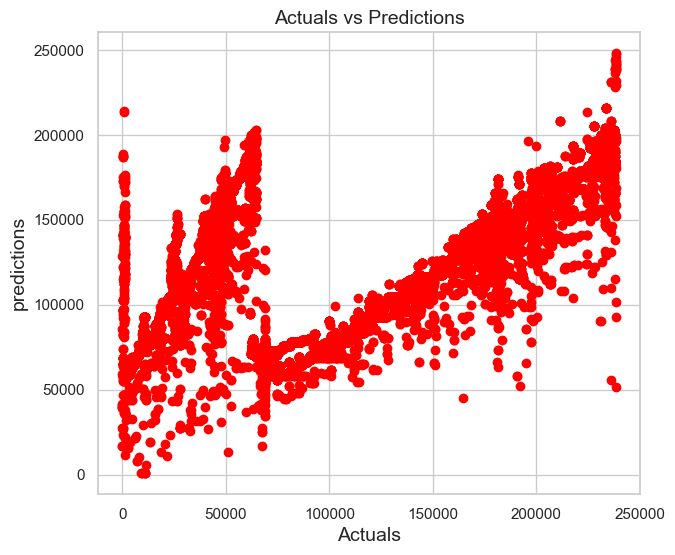

In [105]:
# MODELING XGBOOST REGRESSOR

from xgboost import XGBRegressor
score(XGBRegressor)